## import necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import graphviz

## reading the dataset

In [2]:
# reading from csv file
dataset = pd.read_csv(r'weather.csv')
# creating a data frame
dataset = pd.DataFrame(data = dataset.values,columns = ["Outlook","Temperature","Humidity","Windy","Play"])
dataset

,Outlook,Temperature,Humidity,Windy,Play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes
5,rainy,cool,normal,False,yes
6,rainy,cool,normal,True,no
7,rainy,mild,normal,False,yes
8,rainy,mild,high,True,no
9,sunny,hot,high,False,no


## Convert categorical data to numeric data

In [6]:
le = LabelEncoder()
# by iloc selecting all the rows of data set and 0-5 columns(1st column to 6th column)
# Not necessary to put iloc here because all the columns are the need
dataset_encoded = dataset.iloc[:,0:5]

for i in dataset_encoded:
    dataset_encoded[i] = le.fit_transform(dataset_encoded[i])

dataset_encoded


,Outlook,Temperature,Humidity,Windy,Play
0,0,1,0,0,1
1,0,0,1,1,1
2,0,2,0,1,1
3,0,1,1,0,1
4,1,2,0,0,1
5,1,0,1,0,1
6,1,0,1,1,0
7,1,2,1,0,1
8,1,2,0,1,0
9,2,1,0,0,0


In [9]:
# column labels without the last column
column_names = dataset_encoded.iloc[:,0:4].columns
column_names

Index(['Outlook', 'Temperature', 'Humidity', 'Windy'], dtype='object')

In [10]:
# values of columns used to make predictions
x = dataset_encoded.iloc[:,0:4].values
x

array([[0, 1, 0, 0],
       [0, 0, 1, 1],
       [0, 2, 0, 1],
       [0, 1, 1, 0],
       [1, 2, 0, 0],
       [1, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 2, 1, 0],
       [1, 2, 0, 1],
       [2, 1, 0, 0],
       [2, 1, 0, 1],
       [2, 2, 0, 0],
       [2, 0, 1, 0],
       [2, 2, 1, 1]])

In [11]:
# column we want to predict
y = dataset_encoded.iloc[:,4].values
y

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1])

## Splitting training and testing data

In [12]:
# test_size=0.3 means 30% testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

## creating the decision tree

In [13]:
model = DecisionTreeClassifier(criterion = 'gini', max_depth = 5)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

## Predictions

In [15]:
# predict the Input of outlook = overcast, temperature = cool, humidity = high, windy = false --> yes
("overcast","cool","high","false")
model.predict([(0,0,0,0)])

array([1])

In [14]:
#predict the Input of outlook = overcast, temperature = hot, humidity = high, windy = True --> yes
model.predict([(0,1,0,1)])

array([1])

## Accuracy

In [16]:
#calculating  the accuracy
model.score(x_test, y_test)

0.6

## Decision tree

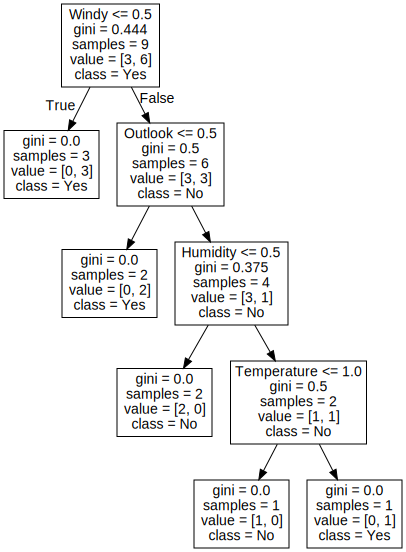

In [24]:
#plot the decision tree
dot_data = tree.export_graphviz(model, out_file = "mytree.dot", feature_names = dataset.columns[0:4], class_names = ["No","Yes"])
with open("mytree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

In [18]:
#plot the decision tree
dot_data = tree.export_graphviz(model, out_file = None, feature_names = column_names, class_names = ["No","Yes"], filled = True, rounded = True, special_characters = True)
    
graph = graphviz.Source(dot_data)
graph.render('dtree_render', view = True)

'dtree_render.pdf'